<h1>What is Credit-Card Fraud?</h1>

Credit card fraud happens when someone uses another person’s credit card or card information without permission to make purchases or withdraw money.<br>
<b>Here are the main kinds you’ll encounter — some are physical, others are digital:</b>

1. Lost or Stolen Card Fraud<br>
2. Card-Not-Present (CNP) Fraud<br>
3. Cloned or Skimmed Card Fraud<br>
4. Application Fraud<br>
5.Account Takeover<br>

<h2> Anomaly Detection </h2>
Anomaly Detection (also called Outlier Detection) means finding data points that behave very differently from the majority of data.

| Algorithm                          | Type                         | How It Works                                                           | Best For                      |
| ---------------------------------- | ---------------------------- | ---------------------------------------------------------------------- | ----------------------------- |
| **Isolation Forest**               | Unsupervised                 | Randomly isolates data points; anomalies are easier to isolate         | Fraud, network intrusions     |
| **One-Class SVM**                  | Unsupervised                 | Finds a boundary around normal data points                             | High-dimensional data         |
| **Autoencoders (Neural Networks)** | Unsupervised (Deep Learning) | Learns to reconstruct normal data; high reconstruction error = anomaly | Complex non-linear data       |
| **Local Outlier Factor (LOF)**     | Unsupervised                 | Compares local density of a point to its neighbors                     | Small-to-medium datasets      |
| **DBSCAN**                         | Clustering                   | Points not belonging to any cluster are anomalies                      | Spatial or pattern-based data |


<h3>Importing Libraries</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

<h3>Importing Libraries for Outlier Detection</h3>


In [3]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

<h3>Reading Our Data</h3>

<b>Description:<b>

Contains 284,807 transactions made by European credit cardholders in September 2013.<br>
Only 492 are fraudulent — about 0.172% frauds → highly imbalanced dataset.<br>
Columns:
| Column       | Description                                                                        |
| ------------ | ---------------------------------------------------------------------------------- |
| `Time`       | Seconds elapsed between this transaction and the first transaction in the dataset. |
| `V1` - `V28` | Result of PCA transformation — actual features are confidential.                   |
| `Amount`     | Transaction amount.                                                                |
| `Class`      | Target variable — `1` = Fraud, `0` = Normal.                                       |


In [4]:
df=pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h3>Data Analysis</h3>

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


| Question             | Answer                                                                                                                           |
| -------------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| Why 28 PCA features? | Because the original confidential dataset had ~30 raw features, and 28 of them were transformed for anonymity and decorrelation. |
| Why not fewer?       | Would lose variance/information — might miss fraud patterns.                                                                     |
| Why not more?        | PCA can’t create more components than original features.                                                                         |
| What’s the benefit?  | Preserves privacy, removes correlation, and retains ~100% of data variance.                                                      |


In [17]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
df['Class'].value_counts(normalize=True) * 100


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

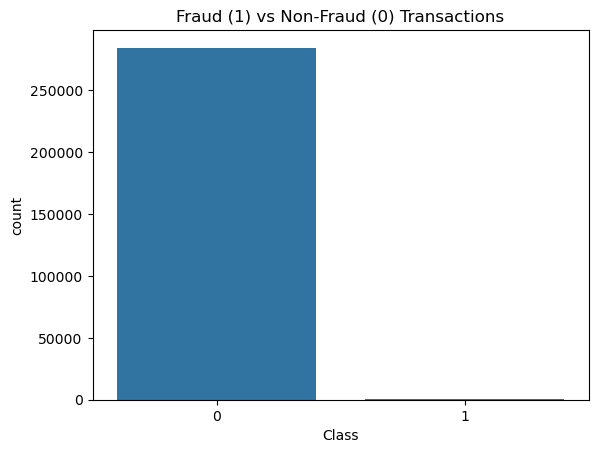

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Fraud (1) vs Non-Fraud (0) Transactions')
plt.show()


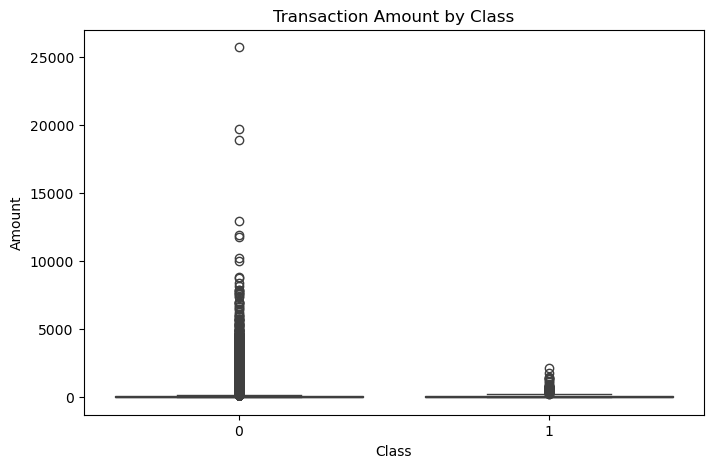

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()


Typically:

Fraud transactions may have smaller or unusual amounts compared to normal ones. But this pattern alone isn’t reliable — that’s why we need ML.

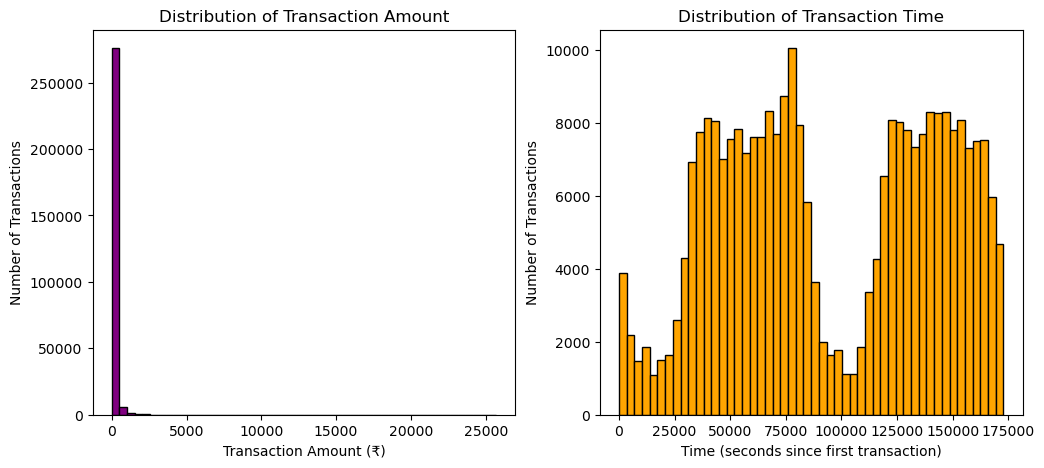

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['Amount'], bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount (₹)")
plt.ylabel("Number of Transactions")

plt.subplot(1,2,2)
plt.hist(df['Time'], bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Number of Transactions")

plt.show()



These help you understand data distribution and decide:

Whether scaling or normalization is needed.
Whether time has a periodic trend

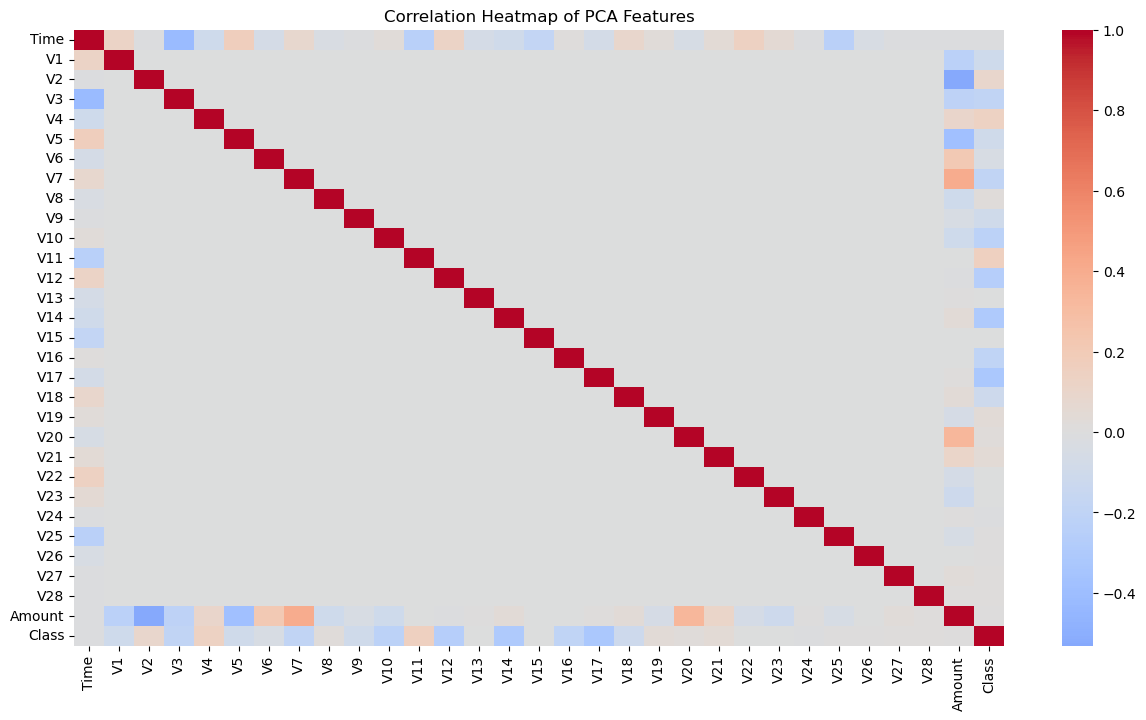

In [17]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of PCA Features")
plt.show()


<h3>Data Preprocessing</h3>

In [5]:
X = df.drop(columns=['Class'])
y = df['Class']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<h3>Now from here we will try out Model building 2 different ways:</h3>

<h1>1. Model Building after Handling Class Imbalance Manually</h1>

<b>Option 1— Under-sampling (reduce normal data)</b>

We keep all frauds (1s) and randomly pick equal number of non-frauds (0s). Result → balanced dataset (equal 0s and 1s) But: we lose some normal samples (less data to learn from).

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

<b>Option 2 — Over-sampling (duplicate frauds)</b>

We increase fraud samples by replicating or synthetically creating new ones.
The most famous method = <b>SMOTE (Synthetic Minority Oversampling Technique).</b>

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res[['Time', 'Amount']] = scaler.fit_transform(X_res[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])


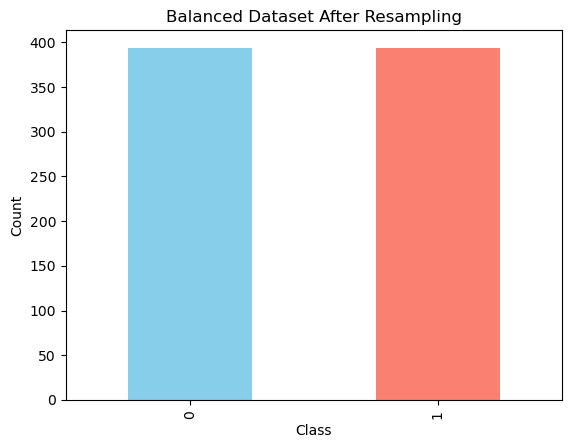

In [41]:
import matplotlib.pyplot as plt

y_res.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Balanced Dataset After Resampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


<h4>Model 1: Logistic Regression</h4>

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_res, y_res)

y_pred_lr = log_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



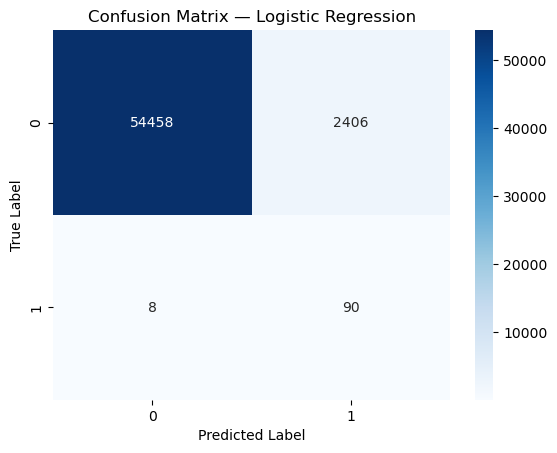

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()


<h4>Model 2: Random Forest Classifier</h4>

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    
)

rf_model.fit(X_res, y_res)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



<h4>Model 3: XGBoost Classifier (Advanced)</h4>

In [33]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.3 MB/s eta 0:00:31
    --------------------------------------- 1.3/72.0 MB 2.3 MB/s eta 0:00:31
   - -------------------------------------- 1.8/72.0 MB 2.3 MB/s eta 0:00:31
   - -------------------------------------- 2.4/72.0 MB 2.3 MB/s eta 0:00:30
   - -------------------------------------- 2.6/72.0 MB 2.3 MB/s eta 0:00:30
   - -------------------------------------- 3.1/72.0 MB 2.3 MB/s eta 0:00:30
   -- ------------------------------------- 3.7/72.0 MB 2.3 MB/s eta 0:00:30
   -- ------------------------------------- 3.9/72.0 MB 2.2 MB/s eta 0:00:31
   -- ------------------------------------- 3.9/72.0 MB 2.2 MB/s eta 0:00:31
   -- ------------------------------------- 4.2/72.0 MB 2.0 MB/s eta 0:00:35
   -- ------------------------------------- 4.7/72.0 MB 1.9 MB/s eta 0:00:36
   -- -------

In [46]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_res, y_res)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


C:\Users\Ashika Singh\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:54:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.92      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962



<h4>Compare All Models</h4>

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, precision, recall, f1])

import pandas as pd
results_df = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1 Score'])
print(results_df)


                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.036058  0.918367  0.069391
1        Random Forest   0.037521  0.908163  0.072065
2              XGBoost   0.026140  0.918367  0.050833


<h1>2. Model Building using PyCaret</h1>

<h2> PYCARET [Auto ML Library] </h2>
PyCaret is an open-source, low-code machine learning library in Python that helps you train, compare, and deploy models with very few lines of code.

<b>You can use PyCaret for:</b>

1. Classification<br>
2. Regression<br>
3. Clustering<br>
4. Anomaly detection<br>
5. NLP, time series, etc.

<b>Using PyCaret for Anomaly Detection</b>

PyCaret has a special Anomaly Detection module, which supports unsupervised models like:

Isolation Forest<br>
KMeans<br>
DBSCAN<br>
One-Class SVM<br>
PCA-based detection

<h3>Comparing different ML Models(Supervised)</h3>

In [1]:
from pycaret.datasets import get_data
from pycaret.classification import setup, compare_models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df=pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Setup PyCaret
clf = setup(data=df, target='Class', session_id=123)


,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [4]:
# Compare multiple models and choose the best
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9566,0.7969,0.9528,0.8668,0.8666,0.8706,76.6900
et,Extra Trees Classifier,0.9996,0.9595,0.7911,0.9456,0.8601,0.8599,0.8640,9.1520
lda,Linear Discriminant Analysis,0.9994,0.9861,0.7795,0.8771,0.8240,0.8237,0.8258,0.5620
lr,Logistic Regression,0.9993,0.9675,0.6774,0.8713,0.7610,0.7607,0.7673,11.4360
ada,Ada Boost Classifier,0.9992,0.9804,0.7035,0.8268,0.7582,0.7579,0.7613,29.9700
dt,Decision Tree Classifier,0.9991,0.8822,0.7648,0.7555,0.7564,0.7559,0.7578,9.1030
ridge,Ridge Classifier,0.9989,0.9861,0.4247,0.8508,0.5625,0.5620,0.5982,0.2740
gbc,Gradient Boosting Classifier,0.9989,0.6422,0.5081,0.7811,0.5929,0.5924,0.6165,130.4540
xgboost,Extreme Gradient Boosting,0.9988,0.8359,0.6072,0.6771,0.6386,0.6381,0.6399,3.3690
knn,K Neighbors Classifier,0.9984,0.5972,0.0583,0.9167,0.1083,0.1081,0.2243,30.3240


In [5]:
from pycaret.classification import save_model

# Save your trained model for later use
save_model(best_model, 'best_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  

<h3>Anomaly Detection Models(Unsupervised)</h3>

<h4>1. Isolation Forest</h4>

#### One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

#### This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

#### Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

#### How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

#### The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation

In [6]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(X_train),random_state=0, verbose=0)                        

In [7]:
iso_forest.fit(X_train,y_train)


IsolationForest(max_samples=227845, random_state=0)

In [8]:
y_pred_iforest= iso_forest.predict(X_test)

In [9]:
y_pred_iforest

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
y_pred_iforest[y_pred_iforest == 1] = 0
y_pred_iforest[y_pred_iforest == -1] = 1


In [11]:
print(accuracy_score(y_test,y_pred_iforest))

0.9976651100733822


In [12]:
print(classification_report(y_test,y_pred_iforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.47      0.41        98

    accuracy                           1.00     56962
   macro avg       0.68      0.73      0.70     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y_test, y_pred_iforest)

array([[56783,    81],
       [   52,    46]])

In [15]:
n_errors = (y_pred_iforest != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 133 errors.


In [17]:
!pip install umap-learn



   ---------------------------------------- 0/2 [pynndescent]
   ---------------------------------------- 0/2 [pynndescent]
   -------------------- ------------------- 1/2 [umap-learn]
   -------------------- ------------------- 1/2 [umap-learn]
   ---------------------------------------- 2/2 [umap-learn]



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap.umap_ as umap

# --- t-SNE Visualization ---
tsne = TSNE(n_components=2, random_state=42, perplexity=20, n_iter=300, learning_rate='auto')

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_pred_iforest, palette=['red','green'])
plt.title("Isolation Forest - t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Anomaly", labels=['Fraud (0)', 'Normal (1)'])
plt.show()

# --- UMAP Visualization ---
reducer = umap.UMAP(random_state=42, n_neighbors=10, min_dist=0.3)

X_umap = reducer.fit_transform(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_pred_iforest, palette=['red','green'])
plt.title("Isolation Forest - UMAP Visualization")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Anomaly", labels=['Fraud (0)', 'Normal (1)'])
plt.show()


<h4>1. OneClassSVM</h4>

In [7]:
svm= OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
y_pred_ocsvm = svm.predict(X_test)

In [ ]:
y_pred_ocsvm [y_pred_ocsvm  == 1] = 0
y_pred_ocsvm [y_pred_ocsvm  == -1] = 1

In [ ]:
print(accuracy_score(y_test,y_pred_ocsvm ))

In [ ]:
print(classification_report(y_test,y_pred_ocsvm ))

In [ ]:
confusion_matrix(y_test, y_pred_ocsvm )

In [ ]:
n_errors = (y_pred_ocsvm  != y_test).sum()
print("SVM have {} errors.".format(n_errors))

In [ ]:

# --- t-SNE Visualization ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_pred_ocsvm, palette=['red','green'])
plt.title("One-Class SVM - t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Anomaly", labels=['Fraud (-1)', 'Normal (1)'])
plt.show()

# --- UMAP Visualization ---
reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_pred_ocsvm, palette=['red','green'])
plt.title("One-Class SVM - UMAP Visualization")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Anomaly", labels=['Fraud (-1)', 'Normal (1)'])
plt.show()
